<a href="https://colab.research.google.com/github/imji0319/PDSH/blob/master/chap3_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#영화 리뷰 분류 : 이진 분류 예제
IMDB Dataset : 
영화 리뷰중 양극단의 리뷰로 5만개로 이루어진 데이터셋

train data : 25000

test data : 25000

50% : positive

50% : negative 



In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000) 
#num_words =  N : 훈련 데이터에서 가장 자주 나타나는 단어 N개만 사용
'''
train_data, test_data : 리뷰의 목록, 각 리뷰는 단어 인덱스 리스트 
train_labels, test_labels : 부정 0, 긍정 1 의 리스트 
'''

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


'\ntrain_data, test_data : 리뷰의 목록, 각 리뷰는 단어 인덱스 리스트 \ntrain_labels, test_labels : 부정 0, 긍정 1 의 리스트 \n'

In [2]:
#리뷰 데이터 -> 영어 단어 
word_index = imdb.get_word_index()
reverse_word_index = dict(
                                   [(value, key) for (key, value) in word_index.items()])
decoded_review= ' '.join(
                                [reverse_word_index.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [3]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
#숫자 리스트 -> 텐서
#one-hot encoding - 0과 1의 벡터로 변환 

import numpy as np

def vectorize_sequences(sequences, dimension = 10000 ):
  results = np.zeros((len(sequences),dimension))
  
  for i, sequences in enumerate(sequences):
    results[i, sequences] =1.
  
  return results


x_train =vectorize_sequences(train_data)
x_test =vectorize_sequences(test_data)

# 레이블 -> 벡터
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
#신경망 모델 정의
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape= (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
#모델 compile
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
#training 
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs =20,
                    batch_size = 512,
                    validation_data =(x_val, y_val))
            

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.5087 - acc: 0.7813 - val_loss: 0.3801 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.3008 - acc: 0.9051 - val_loss: 0.3007 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.2182 - acc: 0.9279 - val_loss: 0.3085 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1751 - acc: 0.9433 - val_loss: 0.2841 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1427 - acc: 0.9541 - val_loss: 0.2847 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.1151 - acc: 0.9654 - val_loss: 0.3160 - val_acc: 0.8774
Epoch 7/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.0981 - acc: 0.9705 - val_loss: 0.3126 - 

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


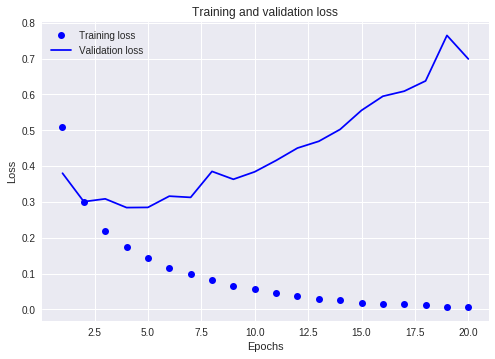

In [10]:
#훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1 )

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

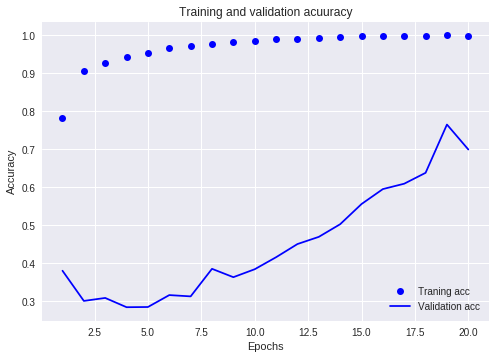

In [11]:
#훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_loss']

plt.plot(epochs, acc, 'bo', label = 'Traning acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acuuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [12]:
#overfitting 문제를 해소하기 위해 epoch 수 감소하여 모델링
model= models.Sequential()
model.add(layers.Dense(16,activation ='relu', input_shape=(10000, )))
model.add(layers.Dense(16,activation= 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_test,y_test)

results

Epoch 1/4
25000/25000 [==============================] - 3s 117us/step - loss: 0.4738 - acc: 0.8221
Epoch 2/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.2674 - acc: 0.9093
Epoch 3/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.2033 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 2s 78us/step


[0.31251243450164795, 0.87564]

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
#모델 실전 상황에 적용 : 어떤 리뷰가 긍정일 확률 확인 가능 
model.predict(x_test)

array([[0.16142054],
       [0.99985063],
       [0.3979758 ],
       ...,
       [0.0811284 ],
       [0.04872197],
       [0.45246446]], dtype=float32)

In [15]:
#추가 실험
'''
3개의 은닉층 사용
층의 은닉 유닛 변명 32유닛
loss -> mse
relu -> tanh 활성화 함수'''

model= models.Sequential()
model.add(layers.Dense(32,activation ='relu', input_shape=(10000, )))
model.add(layers.Dense(32,activation= 'tanh'))
model.add(layers.Dense(32,activation= 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_test,y_test)

results


Epoch 1/4
25000/25000 [==============================] - 3s 117us/step - loss: 0.1361 - acc: 0.8175
Epoch 2/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.0690 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.0509 - acc: 0.9344
Epoch 4/4
25000/25000 [==============================] - 2s 89us/step


[0.09144265385866165, 0.88036]

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 322,177
Trainable params: 322,177
Non-trainable params: 0
_________________________________________________________________
